### Project Goal:

The primary goal of this project is to develop a predictive model that accurately forecasts stock closing prices for the next 30 days and identifies which stocks are expected to exceed their previous closing prices.

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# load the data
data = pd.read_csv(r"/content/drive/MyDrive/csv_files/task.csv")

In [116]:
data.head()

,TradDt,BizDt,Sgmt,Src,FinInstrmTp,FinInstrmId,ISIN,TckrSymb,SctySrs,XpryDt,...,TtlTradgVol,TtlTrfVal,TtlNbOfTxsExctd,SsnId,NewBrdLotQty,Rmks,Rsvd1,Rsvd2,Rsvd3,Rsvd4
0,2024-10-16,2024-10-16,CM,NSE,STK,1412,INE415A01038,AGI,EQ,NaN,...,297948,3.079426e+08,20430,F1,1,NaN,NaN,NaN,NaN,NaN
1,2024-10-16,2024-10-16,CM,NSE,STK,1185,INE371P01015,AMBER,EQ,NaN,...,1596995,8.788452e+09,153867,F1,1,NaN,NaN,NaN,NaN,NaN
2,2024-10-16,2024-10-16,CM,NSE,STK,13560,INE536A01023,GRINDWELL,EQ,NaN,...,280160,6.878788e+08,12124,F1,1,NaN,NaN,NaN,NaN,NaN
3,2024-10-16,2024-10-16,CM,NSE,STK,5633,INE168A01041,J&KBANK,EQ,NaN,...,1452589,1.412291e+08,14566,F1,1,NaN,NaN,NaN,NaN,NaN
4,2024-10-16,2024-10-16,CM,NSE,STK,17186,INE526E01018,SHRIPISTON,EQ,NaN,...,71395,1.599223e+08,10923,F1,1,NaN,NaN,NaN,NaN,NaN


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TradDt               1262 non-null   object 
 1   BizDt                1262 non-null   object 
 2   Sgmt                 1262 non-null   object 
 3   Src                  1262 non-null   object 
 4   FinInstrmTp          1262 non-null   object 
 5   FinInstrmId          1262 non-null   int64  
 6   ISIN                 1262 non-null   object 
 7   TckrSymb             1262 non-null   object 
 8   SctySrs              1260 non-null   object 
 9   XpryDt               0 non-null      float64
 10  FininstrmActlXpryDt  0 non-null      float64
 11  StrkPric             0 non-null      float64
 12  OptnTp               0 non-null      float64
 13  FinInstrmNm          1262 non-null   object 
 14  OpnPric              1262 non-null   float64
 15  HghPric              1262 non-null   f

In [118]:
data.describe()

,FinInstrmId,XpryDt,FininstrmActlXpryDt,StrkPric,OptnTp,OpnPric,HghPric,LwPric,ClsPric,LastPric,...,ChngInOpnIntrst,TtlTradgVol,TtlTrfVal,TtlNbOfTxsExctd,NewBrdLotQty,Rmks,Rsvd1,Rsvd2,Rsvd3,Rsvd4
count,1262.000000,0.0,0.0,0.0,0.0,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,...,0.0,1.262000e+03,1.262000e+03,1262.000000,1262.000000,0.0,0.0,0.0,0.0,0.0
mean,12841.917591,NaN,NaN,NaN,NaN,992.583986,1017.560808,985.258059,1008.212203,1007.775032,...,NaN,1.268182e+06,4.503309e+08,15104.898574,157.713946,NaN,NaN,NaN,NaN,NaN
std,7967.314574,NaN,NaN,NaN,NaN,2710.854007,2750.875773,2694.549284,2733.074374,2732.636022,...,NaN,9.899947e+06,1.929819e+09,40776.476940,521.969966,NaN,NaN,NaN,NaN,NaN
min,13.000000,NaN,NaN,NaN,NaN,1.340000,1.400000,1.270000,1.370000,1.300000,...,NaN,2.000000e+00,1.227000e+03,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,5971.500000,NaN,NaN,NaN,NaN,103.510000,105.077500,103.227500,104.712500,104.625000,...,NaN,1.708750e+04,3.567529e+06,168.750000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,13214.500000,NaN,NaN,NaN,NaN,293.100000,303.860000,289.975000,299.925000,299.450000,...,NaN,9.876350e+04,2.398796e+07,2148.500000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,19212.500000,NaN,NaN,NaN,NaN,886.500000,914.750000,876.887500,900.437500,899.225000,...,NaN,4.972740e+05,2.059727e+08,13399.000000,1.000000,NaN,NaN,NaN,NaN,NaN
max,31970.000000,NaN,NaN,NaN,NaN,49550.000000,49999.900000,49500.000000,49698.750000,49719.950000,...,NaN,3.291809e+08,4.315566e+10,748803.000000,4000.000000,NaN,NaN,NaN,NaN,NaN


In [119]:
data.isnull().sum()

,0
TradDt,0
BizDt,0
Sgmt,0
Src,0
FinInstrmTp,0
FinInstrmId,0
ISIN,0
TckrSymb,0
SctySrs,2
XpryDt,1262


There are columns that complete null lets delete

In [120]:
null_col = data.loc[:,data.isnull().sum()>5].columns
print(null_col)

Index(['XpryDt', 'FininstrmActlXpryDt', 'StrkPric', 'OptnTp', 'UndrlygPric',
       'OpnIntrst', 'ChngInOpnIntrst', 'Rmks', 'Rsvd1', 'Rsvd2', 'Rsvd3',
       'Rsvd4'],
      dtype='object')


In [121]:
data = data.drop(columns=null_col)

In [122]:
data = data.dropna()

In [123]:
data.head

<bound method NDFrame.head of           TradDt       BizDt Sgmt  Src FinInstrmTp  FinInstrmId          ISIN  \
0     2024-10-16  2024-10-16   CM  NSE         STK         1412  INE415A01038   
1     2024-10-16  2024-10-16   CM  NSE         STK         1185  INE371P01015   
2     2024-10-16  2024-10-16   CM  NSE         STK        13560  INE536A01023   
3     2024-10-16  2024-10-16   CM  NSE         STK         5633  INE168A01041   
4     2024-10-16  2024-10-16   CM  NSE         STK        17186  INE526E01018   
...          ...         ...  ...  ...         ...          ...           ...   
1257  2024-10-16  2024-10-16   CM  NSE         STK        15360  INE049I01012   
1258  2024-10-16  2024-10-16   CM  NSE         STK        20954  INE722J01012   
1259  2024-10-16  2024-10-16   CM  NSE         STK        13332  INE343H01029   
1260  2024-10-16  2024-10-16   CM  NSE         STK        13359  INE138Y01010   
1261  2024-10-16  2024-10-16   CM  NSE         STK         8691  INE374B01019   

        TckrSymb SctySrs                FinInstrmNm  ...    LwPric   ClsPric  \
0            AGI      EQ       AGI GREENPAC LIMITED  ...   1011.25   1018.80   
1          AMBER      EQ  AMBER ENTERPRISES (I) LTD  ...   5163.90   5491.65   
2      GRINDWELL      EQ   GRINDWELL NORTON LIMITED  ...   2441.25   2511.35   
3        J&KBANK      EQ            J & K BANK LTD.  ...     96.57     97.12   
4     SHRIPISTON      EQ   SHRIRAM PIST. & RING LTD  ...   2200.00   2264.65   
...          ...     ...                        ...  ...       ...       ...   
1257    NAHARCAP      EQ           NAHAR CAP & FIN.  ...    305.75    309.75   
1258        RKDL      BE      RAVI KUMAR DIST. LTD.  ...     25.11     26.20   
1259   SOLARINDS      EQ   SOLAR INDUSTRIES (I) LTD  ...  11280.90  11522.40   
1260    KFINTECH      EQ  KFIN TECHNOLOGIES LIMITED  ...   1083.65   1109.45   
1261   MUKTAARTS      BE         MUKTA ARTS LIMITED  ...     80.03     84.21   

      LastPric  PrvsClsgPric  SttlmPric  TtlTradgVol     TtlTrfVal  \
0      1014.30       1014.75     1019.0       297948  3.079426e+08   
1      5468.00       5166.80     5491.0      1596995  8.788452e+09   
2      2525.00       2466.90     2511.0       280160  6.878788e+08   
3        97.14         96.81       97.0      1452589  1.412291e+08   
4      2271.00       2227.95     2265.0        71395  1.599223e+08   
...        ...           ...        ...          ...           ...   
1257    310.60        304.35      310.0         7260  2.257453e+06   
1258     26.15         26.23       26.0        16658  4.336589e+05   
1259  11511.65      11386.45    11521.0        44067  5.046966e+08   
1260   1113.00       1097.95     1109.0      1040793  1.147256e+09   
1261     84.00         81.98       84.0        21559  1.794858e+06   

      TtlNbOfTxsExctd  SsnId  NewBrdLotQty  
0               20430     F1             1  
1              153867     F1             1  
2               12124     F1             1  
3               14566     F1             1  
4               10923     F1             1  
...               ...    ...           ...  
1257              622     F1             1  
1258              185     F1             1  
1259            15576     F1             1  
1260            62768     F1             1  
1261              372     F1             1  

[1260 rows x 22 columns]>

In [124]:
# lets correct data type : Convert 'TradDt' and 'BizDt' to datetime format
data["TradDt"] = pd.to_datetime(data["TradDt"])
data["BizDt"]=pd.to_datetime(data["BizDt"])

In [125]:
# # Calculate the difference between 'BizDt' and the future date (30 days later)
future_date = data['BizDt'] + pd.to_timedelta(30, unit='D')
data['DaysToFuture'] = (future_date - data['BizDt']).dt.days

In [126]:
data.columns

Index(['TradDt', 'BizDt', 'Sgmt', 'Src', 'FinInstrmTp', 'FinInstrmId', 'ISIN',
       'TckrSymb', 'SctySrs', 'FinInstrmNm', 'OpnPric', 'HghPric', 'LwPric',
       'ClsPric', 'LastPric', 'PrvsClsgPric', 'SttlmPric', 'TtlTradgVol',
       'TtlTrfVal', 'TtlNbOfTxsExctd', 'SsnId', 'NewBrdLotQty',
       'DaysToFuture'],
      dtype='object')

In [127]:
data["Sgmt"].unique()

array(['CM'], dtype=object)

In [128]:
data["Src"].unique()

array(['NSE'], dtype=object)

In [129]:
data["FinInstrmTp"].unique()

array(['STK'], dtype=object)

In [130]:
data["SctySrs"].unique()

array(['EQ', 'BE', 'ST', 'SM', 'N6', 'NH', 'N5', 'GB', 'GS', 'N8', 'NE',
       'RR', 'BZ', 'NL', 'NF', 'NB', 'NN', 'E1', 'N3', 'NG', 'N1', 'N2',
       'NC', 'ZK', 'N0', 'NR', 'ND', 'IV', 'P1', 'N7', 'NO', 'Y5', 'NJ',
       'YM', 'NS'], dtype=object)

In [131]:
data["SsnId"].unique()

array(['F1'], dtype=object)

In [132]:
data["NewBrdLotQty"].unique()

array([   1,  800,  500, 3000, 2000,  200,  750, 1600, 1200, 1000, 2500,
         16, 1500,  600,  400, 3200,  250,  100, 4000,  300, 3100,  125,
       3333])

Above observation for further prediction there is irrevalant feature that remove.


In [133]:
irrevalant_col = ["Sgmt","Src","FinInstrmTp","SctySrs","SsnId","NewBrdLotQty","FinInstrmId","ISIN","TckrSymb","FinInstrmNm"]
data = data.drop(columns=irrevalant_col)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, 0 to 1261
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TradDt           1260 non-null   datetime64[ns]
 1   BizDt            1260 non-null   datetime64[ns]
 2   OpnPric          1260 non-null   float64       
 3   HghPric          1260 non-null   float64       
 4   LwPric           1260 non-null   float64       
 5   ClsPric          1260 non-null   float64       
 6   LastPric         1260 non-null   float64       
 7   PrvsClsgPric     1260 non-null   float64       
 8   SttlmPric        1260 non-null   float64       
 9   TtlTradgVol      1260 non-null   int64         
 10  TtlTrfVal        1260 non-null   float64       
 11  TtlNbOfTxsExctd  1260 non-null   int64         
 12  DaysToFuture     1260 non-null   int64         
dtypes: datetime64[ns](2), float64(8), int64(3)
memory usage: 137.8 KB


In [135]:
# Split data into X and y
X = data.drop(columns=["TradDt","BizDt","ClsPric"])
y=data["ClsPric"]

In [136]:
X

,OpnPric,HghPric,LwPric,LastPric,PrvsClsgPric,SttlmPric,TtlTradgVol,TtlTrfVal,TtlNbOfTxsExctd,DaysToFuture
0,1015.00,1054.95,1011.25,1014.30,1014.75,1019.0,297948,3.079426e+08,20430,30
1,5190.95,5665.95,5163.90,5468.00,5166.80,5491.0,1596995,8.788452e+09,153867,30
2,2450.00,2543.00,2441.25,2525.00,2466.90,2511.0,280160,6.878788e+08,12124,30
3,96.80,97.77,96.57,97.14,96.81,97.0,1452589,1.412291e+08,14566,30
4,2223.30,2277.00,2200.00,2271.00,2227.95,2265.0,71395,1.599223e+08,10923,30
...,...,...,...,...,...,...,...,...,...,...
1257,306.00,315.90,305.75,310.60,304.35,310.0,7260,2.257453e+06,622,30
1258,25.11,26.98,25.11,26.15,26.23,26.0,16658,4.336589e+05,185,30
1259,11443.15,11570.00,11280.90,11511.65,11386.45,11521.0,44067,5.046966e+08,15576,30
1260,1097.60,1117.90,1083.65,1113.00,1097.95,1109.0,1040793,1.147256e+09,62768,30


### Utilizing Correlation Analysis to Identify and Reduce Multicollinearity Issues

In [137]:
corr_x = X.corr()
corr_x

,OpnPric,HghPric,LwPric,LastPric,PrvsClsgPric,SttlmPric,TtlTradgVol,TtlTrfVal,TtlNbOfTxsExctd,DaysToFuture
OpnPric,1.000000,0.999862,0.999972,0.999905,0.999918,0.999915,-0.030505,0.105755,0.060227,NaN
HghPric,0.999862,1.000000,0.999817,0.999974,0.999769,0.999975,-0.030565,0.109240,0.063515,NaN
LwPric,0.999972,0.999817,1.000000,0.999872,0.999908,0.999881,-0.030464,0.105517,0.059930,NaN
LastPric,0.999905,0.999974,0.999872,1.000000,0.999822,0.999990,-0.030595,0.107544,0.061977,NaN
PrvsClsgPric,0.999918,0.999769,0.999908,0.999822,1.000000,0.999830,-0.030564,0.105678,0.060043,NaN
SttlmPric,0.999915,0.999975,0.999881,0.999990,0.999830,1.000000,-0.030578,0.107800,0.062212,NaN
TtlTradgVol,-0.030505,-0.030565,-0.030464,-0.030595,-0.030564,-0.030578,1.000000,0.173587,0.302889,NaN
TtlTrfVal,0.105755,0.109240,0.105517,0.107544,0.105678,0.107800,0.173587,1.000000,0.909412,NaN
TtlNbOfTxsExctd,0.060227,0.063515,0.059930,0.061977,0.060043,0.062212,0.302889,0.909412,1.000000,NaN
DaysToFuture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

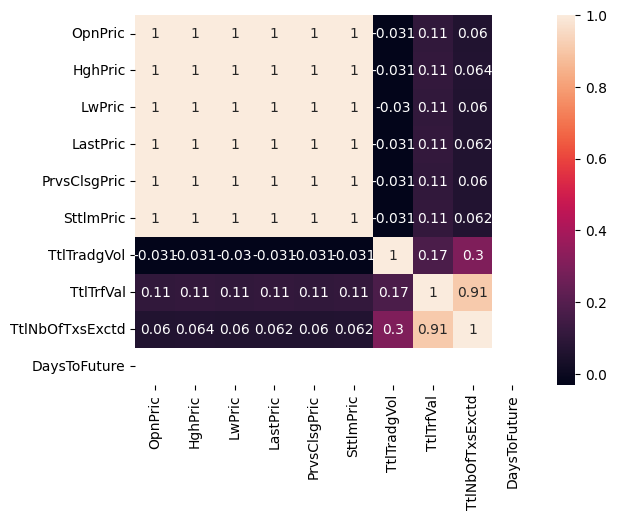

In [138]:
sns.heatmap(corr_x,annot=True)

In [139]:
threshold = 0.8
corr_matrix = X.corr()
high_corr_var = np.where(abs(corr_matrix) > threshold)
high_corr_var = [(corr_matrix.index[X], corr_matrix.columns[y])
                 for X, y in zip(*high_corr_var) if X != y and X < y]

In [140]:
high_corr_var

[('OpnPric', 'HghPric'),
 ('OpnPric', 'LwPric'),
 ('OpnPric', 'LastPric'),
 ('OpnPric', 'PrvsClsgPric'),
 ('OpnPric', 'SttlmPric'),
 ('HghPric', 'LwPric'),
 ('HghPric', 'LastPric'),
 ('HghPric', 'PrvsClsgPric'),
 ('HghPric', 'SttlmPric'),
 ('LwPric', 'LastPric'),
 ('LwPric', 'PrvsClsgPric'),
 ('LwPric', 'SttlmPric'),
 ('LastPric', 'PrvsClsgPric'),
 ('LastPric', 'SttlmPric'),
 ('PrvsClsgPric', 'SttlmPric'),
 ('TtlTrfVal', 'TtlNbOfTxsExctd')]

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
print(vif.sort_values(by="VIF",ascending=False))

           Feature           VIF
5        SttlmPric  69225.918386
3         LastPric  56025.055017
0          OpnPric  28882.898741
1          HghPric  27086.645754
2           LwPric  19633.685908
4     PrvsClsgPric   6345.343907
8  TtlNbOfTxsExctd      6.663489
7        TtlTrfVal      6.337003
9     DaysToFuture      1.382463
6      TtlTradgVol      1.183068


In [142]:
max_vif = 10
remove_column = True

while remove_column:
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    max_vif_feature = vif.loc[vif["VIF"].idxmax()]

    if max_vif_feature["VIF"] > max_vif:
        X = X.drop(max_vif_feature["Feature"],axis=1)
        print(f"Removed feature '{max_vif_feature['Feature']}' with VIF = {max_vif_feature['VIF']:.2f}")
    else:
        remove_column = False

Removed feature 'SttlmPric' with VIF = 69225.92
Removed feature 'LastPric' with VIF = 30773.71
Removed feature 'OpnPric' with VIF = 27941.10
Removed feature 'LwPric' with VIF = 7112.88
Removed feature 'HghPric' with VIF = 2235.15


### Updated Dataset: Removing Features with High Correlation

In [164]:
X.columns

Index(['PrvsClsgPric', 'TtlTradgVol', 'TtlTrfVal', 'TtlNbOfTxsExctd',
       'DaysToFuture'],
      dtype='object')

In [143]:
X.head(5)

,PrvsClsgPric,TtlTradgVol,TtlTrfVal,TtlNbOfTxsExctd,DaysToFuture
0,1014.75,297948,3.079426e+08,20430,30
1,5166.80,1596995,8.788452e+09,153867,30
2,2466.90,280160,6.878788e+08,12124,30
3,96.81,1452589,1.412291e+08,14566,30
4,2227.95,71395,1.599223e+08,10923,30


In [144]:
y.head(5)

,ClsPric
0,1018.80
1,5491.65
2,2511.35
3,97.12
4,2264.65


In [145]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [146]:
X_train.shape

(882, 5)

In [147]:
y_train.shape

(882,)

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [149]:
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [156]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"{model_name} - R-squared (Train): {r2_train:.4f}, R-squared (Test): {r2_test:.4f}")

Decision Tree - R-squared (Train): 1.0000, R-squared (Test): 0.9063
Random Forest - R-squared (Train): 0.9875, R-squared (Test): 0.9693
XGBoost - R-squared (Train): 1.0000, R-squared (Test): 0.9218


#### Result : Based on the results provided, Random Forest seems to be the best choice. It has a high R-squared on both the training (0.9875) and test sets (0.9693), indicating good performance and generalization without overfitting, unlike the Decision Tree and XGBoost, which both show signs of potential overfitting (R-squared on Train = 1.0000).

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best R-squared on Train set: {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_

y_test_pred = best_rf.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"R-squared (Test): {r2_test:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R-squared on Train set: 0.9636
R-squared (Test): 0.9639


In [161]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=10, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean CV R-squared: {cv_scores.mean():.4f}")

Cross-Validation R-squared Scores: [0.99913656 0.97312322 0.99947102 0.94119506 0.904074   0.99677095
 0.99913727 0.99596421 0.999228   0.99357938]
Mean CV R-squared: 0.9802


#### Observation: The model shows strong performance with R-squared scores close to 1 in most folds,indicating excellent fit. The mean R-squared of 0.9802 suggests consistent predictive capability across different subsets of the data.

In [162]:
import joblib
joblib.dump(best_rf, 'random_forest_model.pkl')
loaded_model = joblib.load('random_forest_model.pkl')

RandomForestRegressor(max_depth=30, n_estimators=200, random_state=42)

In [169]:
loaded_model = joblib.load('random_forest_model.pkl')

test_data = {
    'PrvsClsgPric': [150.0],
    'TtlTradgVol': [3000],
    'TtlTrfVal': [450000.0],
    'TtlNbOfTxsExctd': [120],
    'DaysToFuture': [30]  # Updated to 30 days in the future
}

test_df = pd.DataFrame(test_data)

predictions = loaded_model.predict(test_df)

print(f"Previous Closing Price: {test_data['PrvsClsgPric'][0]}")
print(f"Predictions: {predictions}")

Previous Closing Price: 150.0
Predictions: [155.91355]


In [173]:
test_data = {
    'PrvsClsgPric': [175.5],
    'TtlTradgVol': [4200],
    'TtlTrfVal': [560000.0],
    'TtlNbOfTxsExctd': [150],
    'DaysToFuture': [30]
}
test_df = pd.DataFrame(test_data)
predictions = loaded_model.predict(test_df)
previous_price = test_data['PrvsClsgPric'][0]
predicted_price = predictions[0]

print(f"Previous Closing Price: {previous_price}")
print(f"Predicted Closing Price for the next 30 days: {predicted_price}")

if predicted_price > previous_price:
    print("The predicted price indicates an increase compared to the previous closing price.")
else:
    print("The predicted price indicates a decrease compared to the previous closing price.")

Previous Closing Price: 175.5
Predicted Closing Price for the next 30 days: 177.52604999999963
The predicted price indicates an increase compared to the previous closing price.


### Conclusion :
This project developed a Random Forest model to predict stock closing prices for the next 30 days and identify stocks likely to exceed their previous closing prices. After cross-validation, the model achieved an accuracy of 98.02%. These insights can help investors make better decisions and improve trading strategies. Future improvements could focus on refining the model and including additional data for enhanced predictions.